# Why Pre-process Data
Having collected your data from the various streaming or iot devices, you will probably want to start analysing or using it to make predictions. You may have collected differing types of data and they can come from structured or unstructured sources. Structured data will be :
* Is loadable into "spreadsheets"
* Arranged into rows and columns
* Each filled or could be filled
* Data mining friendly

On the other hand unstructured data will come from:
* Word, HTML, PDF documents or PPTs
* Non structured cells
* Variable record lengths,notes free form survey-answers
* Text is relatively sparse, inconsistent and not uniform
* Images, video, music etc


It is worth spending some time understanding your data and effectively pre-processing/cleaning it in order to give yourself the best chance of creating a useful model. As I said in the previous topic if you put rubbish in you will get rubbish out. You will be faced with the following challenges:

* how do I treat missing values in my feature set?
* how do I detect outliers and do I delete them from my dataset?
* what do I do with noisey data and will it impact on my results?
* Can I reduce the volume of my data and still get compariable results?


These are all typical questions that we are faced with when we have collected our data, and in order to address them we will have to use some preprocessing techniques. In the next 3 topics we will  outline techniques that can be used to address the questions outlined above.




# Missing Value Imputation

### **Standalone Imputation** - Imputation 1

It involves imputing the missing values with mean, median or mode.It is conveinient and easy to implement, but introduces bias. Assume that the distribution of missing values is the same as non-missing values.

### **Imputation 2**

Better imputation when compared to the previous one. It makes use of attribute relationships.

Two techniques:

1. Regression
2. Propensity Score

**Regression method**

Assume : all prior attributes are populated
That is, monotonicity in missing values.

				X1| X2| X3| X4| X5

				1.0| 20| 3.5|   4| .
				1.1| 18| 4.0|   2| .
				1.9| 22| 2.2|   .| .
				0.9| 15|   .|   .| .


Use linear regression, sweep left-to-right
       X3=a+b*X2+c*X1;
       X4=d+e*X3+f*X2+g*X1,  and so on
X3 in the second equation is estimated from the first equation if it is missing

**Propensity Scores (nonparametric)**

Let $Y_j$=1 if $X_j$ is missing, 0 otherwise

Estimate $P(Y_j =1)$ based on $X_1$ through $X_{(j-1)}$  using logistic regression

Create propensity score $P(Y_j =1)$ groups. Then align with non-missing X’s who have a similar propensity scores

Within each group, estimate missing $X_{j}$ from known $X_j$ using approximate Bayesian bootstrap.

Repeat until all attributes are populated.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
data=load_iris()
print(list(data.feature_names))
df=pd.DataFrame(data.data,columns=data.feature_names)
#df.columns=['setosa', 'versicolor', 'virginica']
print(data.data)

df[df['sepal length (cm)'].isnull()]

print(df.isnull().sum())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [2]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


# Censoring & Truncation

***Censored*** - Measurement is bounded but not precise
e.g. Call duration > 20 are recorded as 20

***Truncated***- Data point dropped if it exceeds or falls
below a certain bound e.g. customers with less than 2
minutes of calling per month

## Suspicisous Data- Outliers

Consider the data points : 3, 4, 7, 4, 8, 3, 9, 5, 7, 6, 92

92 is suspicious- an outlier ?

What are outliers?

They are, "departure from the expected". They are the datapoints which lie outside a specified pattern of distribution. Often, they are data model or glitches and are potentially legitimate.



# Control Charts

The control chart is a graph used to study how a process changes over time. Data are plotted in time order. This versatile data collection and analysis tool can be used by a variety of industries and is considered one of the seven basic quality tools. Control charts for variable data are used in pairs.

They are typically univariate: X-Bar, R, CUSUM

Main steps (based on statistical inference)
1.Define “expected” and “departure” e.g. Mean and standard error based on sampling distribution of sample mean (aggregate);

2.Compute aggregate each sample

3.Plot aggregates vs expected and error bounds

4.“Out of Control” if aggregates fall outside bounds




In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import statistics

Text(0, 0.5, 'Defects per Million Opportunities')

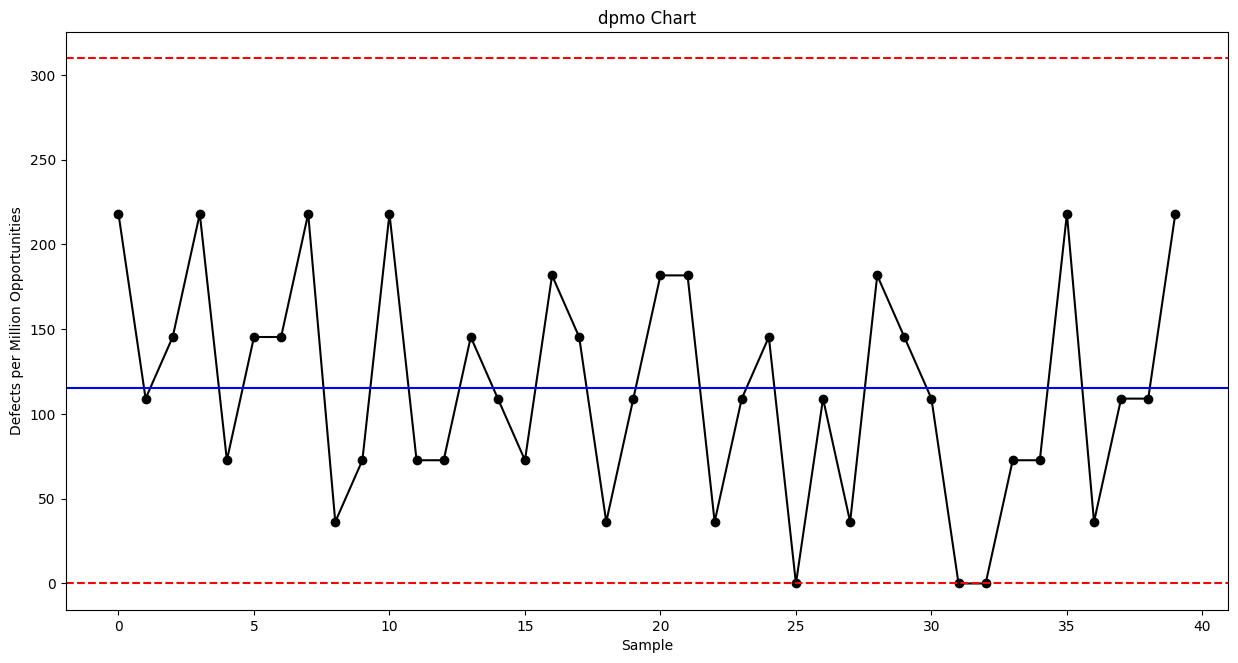

In [9]:

np.random.seed(42)
#sample size
sample_size = 10

defects_opportunities = 2751

# ample number
sample = pd.Series(np.arange(0,40))

# Specify
defects_found = pd.Series(np.random.randint(0,7,40))

# Obtain
dpu = defects_found/sample_size

# Obtain
dpmo = (dpu/defects_opportunities)*1000000

# Create a data frame with the sample number, defects found, dpu and dpmo
df = pd.DataFrame({'sample_number':sample, 'defects_found':defects_found, 'dpu':dpu, 'dpmo':dpmo})

# Plot dpmo chart
plt.figure(figsize=(15,7.5))
plt.plot(df['dpmo'], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(df['dpmo']), color='blue')
plt.axhline(statistics.mean(df['dpmo'])+3000*(np.sqrt((statistics.mean(df['dpmo']/(sample_size*defects_opportunities))))), color='red', linestyle='dashed')
plt.axhline(max(0,statistics.mean(df['dpmo'])-3000*(np.sqrt((statistics.mean(df['dpmo']/(sample_size*defects_opportunities)))))), color='red', linestyle='dashed')
plt.title('dpmo Chart')
plt.xlabel('Sample')
plt.ylabel('Defects per Million Opportunities')

In [ ]:

np.random.seed(42)
#sample size
sample_size = 10

defects_opportunities = 2751

# ample number
sample = pd.Series(np.arange(0,40))

# Specify
defects_found = pd.Series(np.random.randint(0,7,40))

# Obtain
dpu = defects_found/sample_size

# Obtain
dpmo = (dpu/defects_opportunities)*1000000

# Create a data frame with the sample number, defects found, dpu and dpmo
df = pd.DataFrame({'sample_number':sample, 'defects_found':defects_found, 'dpu':dpu, 'dpmo':dpmo})

# Plot dpmo chart
plt.figure(figsize=(15,7.5))
plt.plot(df['dpmo'], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(df['dpmo']), color='blue')
plt.axhline(statistics.mean(df['dpmo'])+3000*(np.sqrt((statistics.mean(df['dpmo']/(sample_size*defects_opportunities))))), color='red', linestyle='dashed')
plt.axhline(max(0,statistics.mean(df['dpmo'])-3000*(np.sqrt((statistics.mean(df['dpmo']/(sample_size*defects_opportunities)))))), color='red', linestyle='dashed')
plt.title('dpmo Chart')
plt.xlabel('Sample')
plt.ylabel('Defects per Million Opportunities')